# TruCulture Trizol Pellet tubes

In [1]:
%matplotlib inline

import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
colors = ["#7199e2", "#8bbf6b", "#ce73c5", "#ff4949", "#606060", "#f9f581"]
from IPython.display import display, Markdown, HTML

# print table without index column
def table_wo_index(df):
    table = HTML(re.sub('(<tr.*>\n) +<th>.*</th>\n', '\\1', df._repr_html_()))
    return(table)

def label_nb_barh(ax, rects):
    for rect in rects:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height()/2., 
                '%d' % int(width),
                ha='center', va='bottom',
               bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))

def label_nb_barv(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, 
                '%d' % int(height),
                ha='center', va='bottom')
        
filepath = "/Volumes/LabExMI/Users/Nolwenn/FreezerPro/DataToImport/"
filename = "TC_Trizol_rack_samples_20161121.csv"
df = pd.read_csv(filepath + filename)

display(Markdown("File *{}* contains **{}** lines for **{}** columns.\n".format(filename, len(df), len(df.columns))))
display(Markdown("List of columns:"))
display(Markdown(";\n".join(["1. {}".format(col) for col in df.columns])+"."))

File *TC_Trizol_rack_samples_20161121.csv* contains **59200** lines for **33** columns.


List of columns:

1. Freezer;
1. Freezer_Descr;
1. Level1;
1. Level1_Descr;
1. Level2;
1. Level2_Descr;
1. Level3;
1. Level3_Descr;
1. Box;
1. Box_Descr;
1. BoxType;
1. RoomID;
1. DonorID;
1. BoxPos;
1. Position;
1. StimulusID;
1. Sample Type;
1. StimulusName;
1. Name;
1. CenterID;
1. VisitID;
1. BatchID;
1. BARCODE;
1. Volume;
1. DonorIDscanned;
1. ExtractionName;
1. StimulationName;
1. StimulationTime;
1. FreezeThaw;
1. FreezerBarcode;
1. ShelfBarcode;
1. RackBarcode;
1. BOXBARCODE.

### Freezer analysis

**5** unique Freezer.

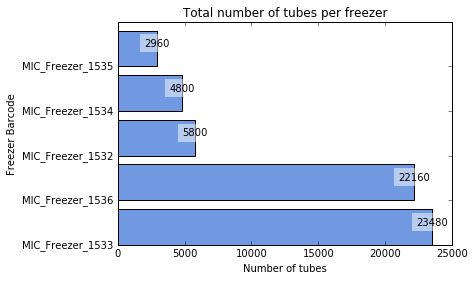

**16** unique shelf for all the **5** freezers. Number of tubes per shelf:

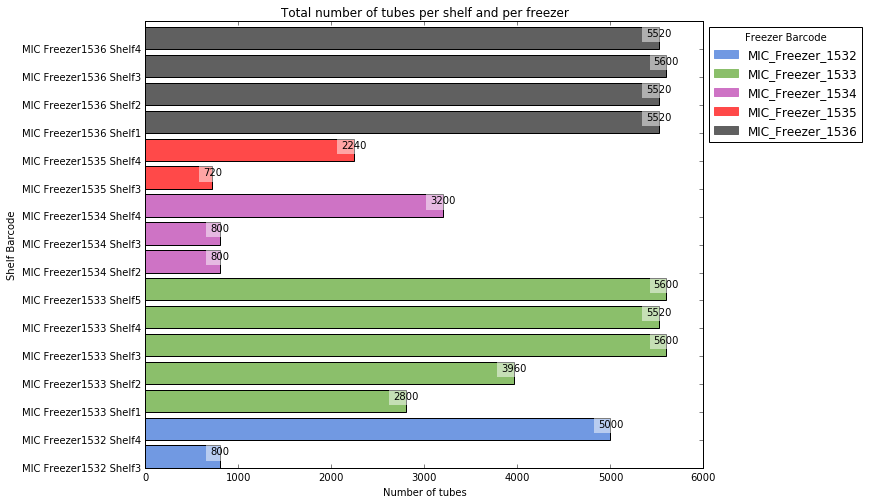

List of **9** unique tube number along shelves:

,NbShelf
Tubes,
720,1
800,3
2240,1
2800,1
3200,1
3960,1
5000,1
5520,4
5600,3


**76** unique rack for all the **5** freezers. Number of tubes per rack:

List of unique tube number along racks:

,NbRack
Tubes,
200,1
400,1
720,7
760,1
800,66


**744** unique box for all the **5** freezers. Number of tubes per box:

List of unique tube number along boxes:

,NbBox
Tubes,
40,8
80,736


### Box analysis

**744** unique Box.

**1** unique BoxType.

### Tube analysis

**59200** unique Name.

**2** unique VisitID, expect 2.

**2** unique BatchID, expect 2.

**40** unique StimulusID, expect 40.

**994** unique DonorID, expect 1000.

,Tubes,VisitID
0,39040,1
1,20160,2


,Tubes,BatchID
0,34840,A
1,24360,B


Each of the **40** StimulusID has **1480** tubes.

List of unique tube number along DonorID:

* 40;
* 80.

,DonorID
Tubes,
40,508
80,486


**994** unique DonorID in total.
Expected 1.000 DonorID, missing 6 DonorID?

In [2]:
display(Markdown("### Freezer analysis"))
display(Markdown("**{}** unique Freezer.".format(df["Freezer"].nunique())))
barcodeperfreezer = pd.DataFrame(df.groupby("Freezer")["Name"].nunique())
barcodeperfreezer.loc[:, "Freezer"] = barcodeperfreezer.index.get_values()
barcodeperfreezer.rename(columns={"Name": "Tubes"}, inplace=True)
barcodeperfreezer.reset_index(drop=True, inplace=True)
barcodeperfreezer.sort_values(by="Tubes", ascending=False, inplace=True)

fig1, ax1 = plt.subplots()
y_pos1 = [i for i in range(len(barcodeperfreezer["Freezer"]))]
rects1 = ax1.barh(y_pos1, barcodeperfreezer["Tubes"], color=colors[0])
ax1.set_yticks(y_pos1)
ax1.set_yticklabels(barcodeperfreezer["Freezer"])
ax1.set_ylabel("Freezer Barcode")
ax1.set_xlabel("Number of tubes")
ax1.set_title("Total number of tubes per freezer")

label_nb_barh(ax1, rects1)

plt.show()

display(Markdown("**{}** unique shelf for all the **{}** freezers. Number of tubes per shelf:".\
                 format(df["Level1"].nunique(), df["Freezer"].nunique())))
barcodepershelfperfreezer = pd.DataFrame(df.groupby(["ShelfBarcode", "Freezer"])["Name"].nunique())
barcodepershelfperfreezer.rename(columns={"Name": "Tubes"}, inplace=True)
# barcodepershelfperfreezer.sort_values(by="Tubes", ascending=False, inplace=True)
shelves = barcodepershelfperfreezer.index.levels[0].tolist()
freezers = barcodepershelfperfreezer.index.levels[1].tolist()
barcodepershelfperfreezer.loc[:, "NbShelf"] = shelves

color_bars = [colors[i] for i in barcodepershelfperfreezer.index.labels[1].tolist()]

fig2, ax2 = plt.subplots(figsize=(10,8))
y_pos2 = [i for i in range(len(shelves))]
rects2 = ax2.barh(y_pos2, barcodepershelfperfreezer["Tubes"], color=color_bars)
ax2.set_yticks(y_pos2)
ax2.set_yticklabels(shelves)
ax2.set_ylabel("Shelf Barcode")
ax2.set_xlabel("Number of tubes")
ax2.set_title("Total number of tubes per shelf and per freezer")
cols_patches = [mpatches.Patch(color=colors[i], label=freezers[i]) for i in range(len(freezers))]
ax2.legend(handles=cols_patches, loc=2, bbox_to_anchor=(1, 1), title="Freezer Barcode")

label_nb_barh(ax2, rects2)

plt.show()

display(Markdown("List of **{}** unique tube number along shelves:".format(barcodepershelfperfreezer["Tubes"].nunique())))
display(pd.DataFrame(barcodepershelfperfreezer.groupby("Tubes")["NbShelf"].count()))

display(Markdown("**{}** unique rack for all the **{}** freezers. Number of tubes per rack:".\
                 format(df["Level2"].nunique(), df["Freezer"].nunique())))
barcodeperrackperfreezer = pd.DataFrame(df.groupby(["RackBarcode", "Freezer"])["Name"].nunique())
racks = barcodeperrackperfreezer.index.levels[0].tolist()
barcodeperrackperfreezer.loc[:, "NbRack"] = racks
barcodeperrackperfreezer.rename(columns={"Name": "Tubes"}, inplace=True)
# display(barcodeperrackperfreezer)
display(Markdown("List of unique tube number along racks:"))
display(pd.DataFrame(barcodeperrackperfreezer.groupby("Tubes")["NbRack"].count()))

display(Markdown("**{}** unique box for all the **{}** freezers. Number of tubes per box:".\
                 format(df["Box"].nunique(), df["Freezer"].nunique())))
barcodeperboxperfreezer = pd.DataFrame(df.groupby(["Box", "Freezer"])["Name"].nunique())
barcodeperboxperfreezer.rename(columns={"Name": "Tubes"}, inplace=True)
boxes = barcodeperboxperfreezer.index.levels[0].tolist()
barcodeperboxperfreezer.loc[:, "NbBox"] = boxes
# display(barcodeperboxperfreezer)
display(Markdown("List of unique tube number along boxes:"))
# display(Markdown(";\n".join(["* {}".format(t) for t in sorted(barcodeperboxperfreezer["Tubes"].unique())])+"."))
display(pd.DataFrame(barcodeperboxperfreezer.groupby("Tubes")["NbBox"].count()))

display(Markdown("### Box analysis"))
display(Markdown("**{}** unique Box.".format(df["Box"].nunique())))
display(Markdown("**{}** unique BoxType.".format(df["BoxType"].nunique())))

display(Markdown("### Tube analysis"))
display(Markdown("**{}** unique Name.".format(df["Name"].nunique())))
display(Markdown("**{}** unique VisitID, expect 2.".format(df["VisitID"].nunique())))
display(Markdown("**{}** unique BatchID, expect 2.".format(df["BatchID"].nunique())))
display(Markdown("**{}** unique StimulusID, expect 40.".format(df["StimulusID"].nunique())))
display(Markdown("**{}** unique DonorID, expect 1000.".format(df["DonorID"].nunique())))

visitperbarcode = pd.DataFrame(df.groupby("VisitID")["Name"].nunique())
visitperbarcode.loc[:, "VisitID"] = visitperbarcode.index.get_values()
visitperbarcode.reset_index(drop=True, inplace=True)
visitperbarcode.rename(columns={"Name": "Tubes"}, inplace=True)
display(visitperbarcode)

batchperbarcode = pd.DataFrame(df.groupby("BatchID")["Name"].nunique())
batchperbarcode.loc[:, "BatchID"] = batchperbarcode.index.get_values()
batchperbarcode.reset_index(drop=True, inplace=True)
batchperbarcode.rename(columns={"Name": "Tubes"}, inplace=True)
display(batchperbarcode)

stimulusperbarcode = pd.DataFrame(df.groupby("StimulusID")["Name"].nunique())
stimulusperbarcode.loc[:, "StimulusID"] = stimulusperbarcode.index.get_values()
stimulusperbarcode.reset_index(drop=True, inplace=True)
stimulusperbarcode.rename(columns={"Name": "Tubes"}, inplace=True)

if stimulusperbarcode["Tubes"].nunique() > 1: 
    figs, axs = plt.subplots(figsize=(10,5))
    y_poss = [i for i in range(len(stimulusperbarcode["StimulusID"]))]
    rectss = axs.barh(stimulusperbarcode["Tubes"].astype(int), y_poss, color=colors[0])
    axs.set_xticks(y_poss)
    axs.set_xticklabels(stimulusperbarcode["StimulusID"])
    axs.set_xlabel("StimulusID")
    axs.set_ylabel("Number of tubes")
    axs.set_yticklabels(stimulusperbarcode["Tubes"].astype(str))
    axs.set_title("Total number of tubes per StimulusID")

    plt.show()
else:
    display(Markdown("Each of the **{}** StimulusID has **{}** tubes.".format(stimulusperbarcode["StimulusID"].nunique(), stimulusperbarcode["Tubes"].unique()[0])))

donorperbarcode = pd.DataFrame(df.groupby("DonorID")["Name"].nunique())
donorperbarcode.loc[:, "DonorID"] = donorperbarcode.index.get_values()
donorperbarcode.reset_index(drop=True, inplace=True)
donorperbarcode.rename(columns={"Name": "Tubes"}, inplace=True)
display(Markdown("List of unique tube number along DonorID:"))
display(Markdown(";\n".join(["* {}".format(t) for t in sorted(donorperbarcode["Tubes"].unique())])+"."))
donorpertube = pd.DataFrame(donorperbarcode.groupby("Tubes")["DonorID"].count())
donorpertube.rename(columns={"DonorID": "NbDonors"})
display(donorpertube)
if donorpertube["DonorID"].nunique() <= 1000:
    display(Markdown("**{}** unique DonorID in total.\nExpected 1.000 DonorID, missing {} DonorID?".format(donorperbarcode["DonorID"].nunique(), (1000-donorperbarcode["DonorID"].nunique()))))
else:
    display(Markdown("**{}** unique DonorID in total.\nExpected 1.000 DonorID, exceed {} DonorID?".format(donorperbarcode["DonorID"].nunique(), (donorperbarcode["DonorID"].nunique()-1000))))